In [1]:
#Importar las librerías
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Cargar los datos desde el csv
cell_df = pd.read_csv("cell_samples.csv")
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


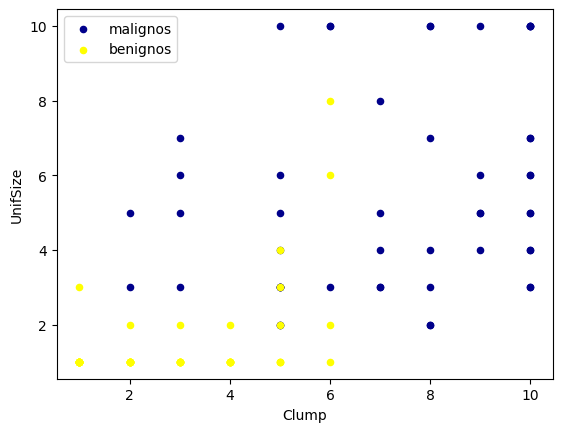

In [3]:
#Ver la distribución de las clases
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignos');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benignos', ax=ax);
plt.show()

In [4]:
#Ver los tipos de datos de los atributos
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [5]:
#El atributo BareNuc incluye valores que no son numéricos (tiene algunos signos '?').
#Se convierte a valores de tipo entero
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

<ipython-input-5-7adb5c4c36de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [6]:
#Seleccionar características para el modelo y construir la matriz X
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [8]:
#Se counstruye el vector 'y' con las clases (variables objetivo)
cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])
y [0:5]

array([2, 2, 2, 2, 2])

In [9]:
#Se divide en train y test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [10]:
#Se hace el Modelo de SVM utilizando Scikit-learn y el kernell rbf (Radial Basis Function)
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

#El algoritmo de SVM ofrece varias alternativas de funciones de kernel para el procesamiento
#Básicamente, se le llama kernelling a mapear los datos en una dimensión espacial más alta (2D, 3D, ..)
#La función matemática utilizada para la transformación se llama función kernel
#y puede ser de diferentes tipos

#1.Lineal
#2.Polynomial
#3.Radial basis function (RBF)
#4.Sigmoide

SVC()

In [11]:
#Hacer la predicción
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 4, 2, 4, 2])

In [12]:
#Evaluar
#Rendimiento con base a f1_score
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

#En el análisis estadístico de la clasificación binaria, la puntuación F1 (también F-score o F-measure)
#es una medida de la precisión de una prueba. Considera tanto el precision p como el recall r de la prueba
#para calcular la puntuación: p es el número de resultados positivos correctos dividido por el número de todos
#los resultados positivos devueltos por el clasificador, y r es el número de resultados positivos correctos
#dividido por el número de todas las muestras relevantes (todas las muestras que deberían haberse identificado
#como positivas).
#La métrica F1 alcanza su mejor valor en 1 (precisión perfecta y recordatorio) y el peor en 0.

0.9639038982104676

In [25]:
#Utilizar el índice Jaccard para calcular accuracy
from sklearn.metrics import jaccard_score

jaccard_score(y_test, yhat,pos_label = 2)
#El índice de similitud de Jaccard (a veces llamado coeficiente de similitud de Jaccard) compara a los miembros
#en dos conjuntos para ver qué miembros se comparten y cuáles son distintos.
#Es una medida de similitud para los dos conjuntos de datos, con un rango de 0% a 100%.
#Cuanto mayor sea el porcentaje, más similares serán las dos poblaciones.

0.9444444444444444